In [1]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, LSTM, TimeDistributed, RepeatVector
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
import csv
%matplotlib inline

In [76]:
n_in = 365 #历史数量
n_out = 28 #预测数量
n_features = 1
# n_test = 1
n_val = 1
n_epochs = 20
test_index = [1378, 1575, 1772]

In [51]:
df_stw = pd.read_csv('Projectdata.csv')
df_stw.tail()

,date,Hobbies_CA_1,Household_1_CA_1,Household_2_CA_1,Foods_1_CA_1,Foods_2_CA_1,Foods_3_CA_1,Hobbies_CA_2,Household_1_CA_2,Household_2_CA_2,Foods_1_CA_2,Foods_2_CA_2,Foods_3_CA_2,Hobbies_CA_3,Household_1_CA_3,Household_2_CA_3,Foods_1_CA_3,Foods_2_CA_3,Foods_3_CA_3
1964,2016-06-15,431,210,147,175,279,1526,328,242,180,74,241,1482,378,363,202,173,364,1796
1965,2016-06-16,353,218,126,144,309,1545,257,229,157,162,234,1322,437,331,172,189,388,1850
1966,2016-06-17,344,230,137,179,403,1901,328,239,217,181,271,1588,450,366,184,176,456,2029
1967,2016-06-18,501,289,160,185,444,2352,392,357,320,271,353,2038,621,463,274,236,505,2443
1968,2016-06-19,390,287,135,161,401,2056,339,331,296,223,320,2044,490,452,221,215,499,2385


In [4]:
colnames = ['date', "Hobbies_CA_1","Household_1_CA_1","Household_2_CA_1",
                      "Foods_1_CA_1","Foods_2_CA_1","Foods_3_CA_1","Hobbies_CA_2","Household_1_CA_2",
                      "Household_2_CA_2","Foods_1_CA_2","Foods_2_CA_2","Foods_3_CA_2","Hobbies_CA_3",
                      "Household_1_CA_3","Household_2_CA_3","Foods_1_CA_3","Foods_2_CA_3","Foods_3_CA_3"]

In [5]:
def load_stw_data() -> pd.DataFrame:
    
    df_stw = pd.read_csv('Projectdata.csv')
    df_stw.columns = colnames
    
    return df_stw

In [6]:
#MinMaxScaler数据归一化，可以帮助网络模型更快的拟合，稍微有一些提高准确率的效果
def minmaxscaler(data: pd.DataFrame) -> pd.DataFrame:
    
    for colname in colnames[1:]:
    
        volume = data[colname].values
        volume = volume.reshape(len(volume), 1)
        volume = scaler.fit_transform(volume)
        volume = volume.reshape(len(volume),)    
        data[colname] = volume
        
    return data

In [77]:
# test1 1575 train data
def build_train_1(train, colname, n_in, n_out):
    
    train = train.drop(["date"], axis=1)
    X_train, Y_train = [], []
    for i in range(1378-n_in-n_out+1):
        X_train.append(np.array(train.iloc[i:i+n_in][colname]))
        Y_train.append(np.array(train.iloc[i+n_in:i+n_in+n_out][colname]))
        
    return np.array(X_train), np.array(Y_train)

In [78]:
# test2 1378 train data
def build_train_2(train, colname, n_in, n_out):
    
    train = train.drop(["date"], axis=1)
    X_train, Y_train = [], []
    for i in range(1378-n_in-n_out+1):
        X_train.append(np.array(train.iloc[i:i+n_in][colname]))
        Y_train.append(np.array(train.iloc[i+n_in:i+n_in+n_out][colname]))
        
    return np.array(X_train), np.array(Y_train)

In [79]:
# test3 1772 train data
def build_train_3(train, colname, n_in, n_out):
    
    train = train.drop(["date"], axis=1)
    X_train, Y_train = [], []
    for i in range(1378-n_in-n_out+1):
        X_train.append(np.array(train.iloc[i:i+n_in][colname]))
        Y_train.append(np.array(train.iloc[i+n_in:i+n_in+n_out][colname]))
        
    return np.array(X_train), np.array(Y_train)

In [8]:
def split_data(x, y, n_test: int):
    
    x_train = x[:-n_val-n_out+1]
    x_val = x[-n_val:]
    y_train = y[:-n_val-n_out+1]
    y_val = y[-n_val:]
    
    return x_train, y_train, x_val, y_val

In [17]:
def build_lstm(n_in: int, n_features: int):
    
    model = Sequential()
    model.add(LSTM(12, activation='relu', input_shape=(n_in, n_features)))
    model.add(Dropout(0.3))
    model.add(Dense(n_out))
    model.compile(optimizer='adam', loss='mae')
    
    return model

In [18]:
def model_fit(x_train, y_train, x_val, y_val, n_features):
    
    model = build_lstm(
        n_in   = n_in,
        n_features= 1
    )
    model.compile(loss='mae', optimizer='adam')
    model.fit(x_train, y_train, epochs=n_epochs, batch_size=128, verbose=1,  validation_data=(x_val, y_val))
    m = model.evaluate(x_val, y_val)
    print(m)
    
    return model

In [19]:
data = load_stw_data()
scaler = MinMaxScaler(feature_range=(0, 1))
data = minmaxscaler(data)
data_copy = data.copy()

In [81]:
for colname in colnames[1:]:
    print(colname)
    
    x, y = build_train_1(data_copy, colname, n_in, n_out)
    x_train, y_train, x_val, y_val = split_data(x, y, n_val)
    model = build_lstm(n_in, 1)
    model = model_fit(x_train, y_train, x_val, y_val, 1)
    predict = model.predict(x_val) 
    
    validation = scaler.inverse_transform(predict)[-1]
    validation
    
    actual = scaler.inverse_transform(y_val)[-1]
    actual
    
    predict = validation
    actual = actual
    
    i = test_index[0]

    x_test = data_copy.iloc[1:i+1][colname][-1:]
    y_test = data_copy.iloc[i+1:i+29][colname][-1:]
    test_date = data_copy['date'].iloc[i]
    pred = model.predict(x_test)
    pred = scaler.inverse_transform(pred)[-1]

    with open("result_test1.csv","w") as f:
        writer = csv.writer(f, delimiter=';')
        writer.writerow([colname,test_date]+pred.tolist())
    
    '''
    x = [x for x in range(28)]
    fig, ax = plt.subplots(figsize=(15,5),dpi = 300)
    ax.plot(x, predict, linewidth=2.0,label = "predict")
    ax.plot(x, actual, linewidth=2.0,label = "actual")
    ax.legend(loc=2);
    # ax.set_title(bf_name)
    plt.ylim((0, np.max(actual)+100))
    plt.grid(linestyle='-.')
    plt.show()
    
    error = 0
    summery = 0
    for i in range(24):
        error += abs(predict[i] - actual[i])
        summery += actual[i]
    acc = 1 - error/summery
    acc
    
    
    with open("result.csv","w") as f:
        writer = csv.writer(f, delimiter=';')
        writer.writerow([colname]+predict.tolist())
    '''

Hobbies_CA_1
Epoch 1/20
8/8 [==============================] - 1s 54ms/step - loss: 0.4695 - val_loss: 0.5146
Epoch 2/20
8/8 [==============================] - 0s 45ms/step - loss: 0.4460 - val_loss: 0.4898
Epoch 3/20
8/8 [==============================] - 0s 44ms/step - loss: 0.4200 - val_loss: 0.4618
Epoch 4/20
8/8 [==============================] - 0s 45ms/step - loss: 0.3912 - val_loss: 0.4271
Epoch 5/20
8/8 [==============================] - 0s 45ms/step - loss: 0.3557 - val_loss: 0.3757
Epoch 6/20
8/8 [==============================] - 0s 45ms/step - loss: 0.3174 - val_loss: 0.3200
Epoch 7/20
8/8 [==============================] - 0s 44ms/step - loss: 0.2892 - val_loss: 0.3028
Epoch 8/20
8/8 [==============================] - 0s 45ms/step - loss: 0.2661 - val_loss: 0.2643
Epoch 9/20
8/8 [==============================] - 0s 44ms/step - loss: 0.2454 - val_loss: 0.2436
Epoch 10/20
8/8 [==============================] - 0s 45ms/step - loss: 0.2266 - val_loss: 0.2208
Epoch 11/20
8/8 

8/8 [==============================] - 0s 45ms/step - loss: 0.1943 - val_loss: 0.1837
Epoch 13/20
8/8 [==============================] - 0s 43ms/step - loss: 0.1812 - val_loss: 0.1706
Epoch 14/20
8/8 [==============================] - 0s 45ms/step - loss: 0.1754 - val_loss: 0.1614
Epoch 15/20
8/8 [==============================] - 0s 44ms/step - loss: 0.1682 - val_loss: 0.1571
Epoch 16/20
8/8 [==============================] - 0s 45ms/step - loss: 0.1615 - val_loss: 0.1512
Epoch 17/20
8/8 [==============================] - 0s 43ms/step - loss: 0.1567 - val_loss: 0.1471
Epoch 18/20
8/8 [==============================] - 0s 45ms/step - loss: 0.1529 - val_loss: 0.1453
Epoch 19/20
8/8 [==============================] - 0s 44ms/step - loss: 0.1478 - val_loss: 0.1439
Epoch 20/20
1/1 [==============================] - 0s 12ms/step - loss: 0.1393
0.13930003345012665
Foods_2_CA_1
Epoch 1/20
8/8 [==============================] - 1s 53ms/step - loss: 0.3201 - val_loss: 0.3422
Epoch 2/20
8/8 [===

Household_1_CA_2
Epoch 1/20
8/8 [==============================] - 1s 53ms/step - loss: 0.4026 - val_loss: 0.3501
Epoch 2/20
8/8 [==============================] - 0s 44ms/step - loss: 0.3848 - val_loss: 0.3323
Epoch 3/20
8/8 [==============================] - 0s 45ms/step - loss: 0.3632 - val_loss: 0.3104
Epoch 4/20
8/8 [==============================] - 0s 46ms/step - loss: 0.3370 - val_loss: 0.2799
Epoch 5/20
8/8 [==============================] - 0s 44ms/step - loss: 0.3093 - val_loss: 0.2450
Epoch 6/20
8/8 [==============================] - 0s 44ms/step - loss: 0.2868 - val_loss: 0.2257
Epoch 7/20
8/8 [==============================] - 0s 44ms/step - loss: 0.2694 - val_loss: 0.2096
Epoch 8/20
8/8 [==============================] - 0s 44ms/step - loss: 0.2517 - val_loss: 0.1879
Epoch 9/20
8/8 [==============================] - 0s 43ms/step - loss: 0.2341 - val_loss: 0.1650
Epoch 10/20
8/8 [==============================] - 0s 44ms/step - loss: 0.2162 - val_loss: 0.1501
Epoch 11/20


8/8 [==============================] - 0s 45ms/step - loss: 0.1491 - val_loss: 0.1081
Epoch 13/20
8/8 [==============================] - 0s 45ms/step - loss: 0.1379 - val_loss: 0.0976
Epoch 14/20
8/8 [==============================] - 0s 45ms/step - loss: 0.1305 - val_loss: 0.0885
Epoch 15/20
8/8 [==============================] - 0s 44ms/step - loss: 0.1232 - val_loss: 0.0871
Epoch 16/20
8/8 [==============================] - 0s 44ms/step - loss: 0.1200 - val_loss: 0.0756
Epoch 17/20
8/8 [==============================] - 0s 45ms/step - loss: 0.1159 - val_loss: 0.0744
Epoch 18/20
8/8 [==============================] - 0s 45ms/step - loss: 0.1114 - val_loss: 0.0717
Epoch 19/20
8/8 [==============================] - 0s 46ms/step - loss: 0.1078 - val_loss: 0.0718
Epoch 20/20
1/1 [==============================] - 0s 11ms/step - loss: 0.0733
0.07330208271741867
Foods_3_CA_2
Epoch 1/20
8/8 [==============================] - 1s 52ms/step - loss: 0.4073 - val_loss: 0.3155
Epoch 2/20
8/8 [===

Household_2_CA_3
Epoch 1/20
8/8 [==============================] - 1s 54ms/step - loss: 0.4959 - val_loss: 0.5479
Epoch 2/20
8/8 [==============================] - 0s 44ms/step - loss: 0.4811 - val_loss: 0.5325
Epoch 3/20
8/8 [==============================] - 0s 44ms/step - loss: 0.4661 - val_loss: 0.5166
Epoch 4/20
8/8 [==============================] - 0s 45ms/step - loss: 0.4505 - val_loss: 0.4993
Epoch 5/20
8/8 [==============================] - 0s 45ms/step - loss: 0.4326 - val_loss: 0.4786
Epoch 6/20
8/8 [==============================] - 0s 45ms/step - loss: 0.4093 - val_loss: 0.4476
Epoch 7/20
8/8 [==============================] - 0s 44ms/step - loss: 0.3717 - val_loss: 0.3735
Epoch 8/20
8/8 [==============================] - 0s 44ms/step - loss: 0.3121 - val_loss: 0.3007
Epoch 9/20
8/8 [==============================] - 0s 45ms/step - loss: 0.2786 - val_loss: 0.2652
Epoch 10/20
8/8 [==============================] - 0s 46ms/step - loss: 0.2467 - val_loss: 0.2057
Epoch 11/20


8/8 [==============================] - 0s 45ms/step - loss: nan - val_loss: nan
Epoch 13/20
8/8 [==============================] - 0s 44ms/step - loss: nan - val_loss: nan
Epoch 14/20
8/8 [==============================] - 0s 44ms/step - loss: nan - val_loss: nan
Epoch 15/20
8/8 [==============================] - 0s 44ms/step - loss: nan - val_loss: nan
Epoch 16/20
8/8 [==============================] - 0s 45ms/step - loss: nan - val_loss: nan
Epoch 17/20
8/8 [==============================] - 0s 44ms/step - loss: nan - val_loss: nan
Epoch 18/20
8/8 [==============================] - 0s 44ms/step - loss: nan - val_loss: nan
Epoch 19/20
8/8 [==============================] - 0s 44ms/step - loss: nan - val_loss: nan
Epoch 20/20
1/1 [==============================] - 0s 11ms/step - loss: nan
nan


In [ ]:
for colname in colnames[1:]:
    print(colname)
    
    x, y = build_train_2(data_copy, colname, n_in, n_out)
    x_train, y_train, x_val, y_val = split_data(x, y, n_val)
    model = build_lstm(n_in, 1)
    model = model_fit(x_train, y_train, x_val, y_val, 1)
    predict = model.predict(x_val) 
    
    validation = scaler.inverse_transform(predict)[-1]
    validation
    
    actual = scaler.inverse_transform(y_val)[-1]
    actual
    
    predict = validation
    actual = actual
    
    i = test_index[1]

    x_test = data_copy.iloc[1:i+1][colname][-1:]
    y_test = data_copy.iloc[i+1:i+29][colname][-1:]
    test_date = data_copy['date'].iloc[i]
    pred = model.predict(x_test)
    pred = scaler.inverse_transform(pred)[-1]

    with open("result_test2.csv","w") as f:
        writer = csv.writer(f, delimiter=';')
        writer.writerow([colname,test_date]+pred.tolist())
    
    '''
    x = [x for x in range(28)]
    fig, ax = plt.subplots(figsize=(15,5),dpi = 300)
    ax.plot(x, predict, linewidth=2.0,label = "predict")
    ax.plot(x, actual, linewidth=2.0,label = "actual")
    ax.legend(loc=2);
    # ax.set_title(bf_name)
    plt.ylim((0, np.max(actual)+100))
    plt.grid(linestyle='-.')
    plt.show()
    
    error = 0
    summery = 0
    for i in range(24):
        error += abs(predict[i] - actual[i])
        summery += actual[i]
    acc = 1 - error/summery
    acc
    
    
    with open("result.csv","w") as f:
        writer = csv.writer(f, delimiter=';')
        writer.writerow([colname]+predict.tolist())
    '''

Hobbies_CA_1
Epoch 1/20
8/8 [==============================] - 1s 54ms/step - loss: 0.4695 - val_loss: 0.5146
Epoch 2/20
8/8 [==============================] - 0s 45ms/step - loss: 0.4460 - val_loss: 0.4898
Epoch 3/20
8/8 [==============================] - 0s 44ms/step - loss: 0.4200 - val_loss: 0.4618
Epoch 4/20
8/8 [==============================] - 0s 45ms/step - loss: 0.3912 - val_loss: 0.4271
Epoch 5/20
8/8 [==============================] - 0s 45ms/step - loss: 0.3557 - val_loss: 0.3757
Epoch 6/20
8/8 [==============================] - 0s 45ms/step - loss: 0.3174 - val_loss: 0.3200
Epoch 7/20
8/8 [==============================] - 0s 44ms/step - loss: 0.2892 - val_loss: 0.3028
Epoch 8/20
8/8 [==============================] - 0s 45ms/step - loss: 0.2661 - val_loss: 0.2643
Epoch 9/20
8/8 [==============================] - 0s 44ms/step - loss: 0.2454 - val_loss: 0.2436
Epoch 10/20
8/8 [==============================] - 0s 45ms/step - loss: 0.2266 - val_loss: 0.2208
Epoch 11/20
8/8 

In [ ]:
for colname in colnames[1:]:
    print(colname)
    
    x, y = build_train_3(data_copy, colname, n_in, n_out)
    x_train, y_train, x_val, y_val = split_data(x, y, n_val)
    model = build_lstm(n_in, 1)
    model = model_fit(x_train, y_train, x_val, y_val, 1)
    predict = model.predict(x_val) 
    
    validation = scaler.inverse_transform(predict)[-1]
    validation
    
    actual = scaler.inverse_transform(y_val)[-1]
    actual
    
    predict = validation
    actual = actual
    
    i = test_index[2]

    x_test = data_copy.iloc[1:i+1][colname][-1:]
    y_test = data_copy.iloc[i+1:i+29][colname][-1:]
    test_date = data_copy['date'].iloc[i]
    pred = model.predict(x_test)
    pred = scaler.inverse_transform(pred)[-1]

    with open("result_test3.csv","w") as f:
        writer = csv.writer(f, delimiter=';')
        writer.writerow([colname,test_date]+pred.tolist())
    
    '''
    x = [x for x in range(28)]
    fig, ax = plt.subplots(figsize=(15,5),dpi = 300)
    ax.plot(x, predict, linewidth=2.0,label = "predict")
    ax.plot(x, actual, linewidth=2.0,label = "actual")
    ax.legend(loc=2);
    # ax.set_title(bf_name)
    plt.ylim((0, np.max(actual)+100))
    plt.grid(linestyle='-.')
    plt.show()
    
    error = 0
    summery = 0
    for i in range(24):
        error += abs(predict[i] - actual[i])
        summery += actual[i]
    acc = 1 - error/summery
    acc
    
    
    with open("result.csv","w") as f:
        writer = csv.writer(f, delimiter=';')
        writer.writerow([colname]+predict.tolist())
    '''

Hobbies_CA_1
Epoch 1/20
8/8 [==============================] - 1s 54ms/step - loss: 0.4695 - val_loss: 0.5146
Epoch 2/20
8/8 [==============================] - 0s 45ms/step - loss: 0.4460 - val_loss: 0.4898
Epoch 3/20
8/8 [==============================] - 0s 44ms/step - loss: 0.4200 - val_loss: 0.4618
Epoch 4/20
8/8 [==============================] - 0s 45ms/step - loss: 0.3912 - val_loss: 0.4271
Epoch 5/20
8/8 [==============================] - 0s 45ms/step - loss: 0.3557 - val_loss: 0.3757
Epoch 6/20
8/8 [==============================] - 0s 45ms/step - loss: 0.3174 - val_loss: 0.3200
Epoch 7/20
8/8 [==============================] - 0s 44ms/step - loss: 0.2892 - val_loss: 0.3028
Epoch 8/20
8/8 [==============================] - 0s 45ms/step - loss: 0.2661 - val_loss: 0.2643
Epoch 9/20
8/8 [==============================] - 0s 44ms/step - loss: 0.2454 - val_loss: 0.2436
Epoch 10/20
8/8 [==============================] - 0s 45ms/step - loss: 0.2266 - val_loss: 0.2208
Epoch 11/20
8/8 

7/8 [=========================>....] - ETA: 0s - loss: 0.47508/8 [==============================] - 0s 45ms/step - loss: 0.1943 - val_loss: 0.1837
Epoch 13/20
8/8 [==============================] - 0s 43ms/step - loss: 0.1812 - val_loss: 0.1706
Epoch 14/20
8/8 [==============================] - 0s 45ms/step - loss: 0.1754 - val_loss: 0.1614
Epoch 15/20
8/8 [==============================] - 0s 44ms/step - loss: 0.1682 - val_loss: 0.1571
Epoch 16/20
8/8 [==============================] - 0s 45ms/step - loss: 0.1615 - val_loss: 0.1512
Epoch 17/20
8/8 [==============================] - 0s 43ms/step - loss: 0.1567 - val_loss: 0.1471
Epoch 18/20
8/8 [==============================] - 0s 45ms/step - loss: 0.1529 - val_loss: 0.1453
Epoch 19/20
8/8 [==============================] - 0s 44ms/step - loss: 0.1478 - val_loss: 0.1439
Epoch 20/20
1/1 [==============================] - 0s 12ms/step - loss: 0.1393
0.13930003345012665
Foods_2_CA_1
Epoch 1/20
8/8 [==============================] - 1s 53

In [37]:
with open("result.csv","w") as f:
        writer = csv.writer(f, delimiter=';')

        writer.writerow(predict.tolist())

In [35]:
predict.tolist()

[695.7299194335938,
 2055.74853515625,
 2339.1875,
 1877.6107177734375,
 1950.6683349609375,
 2324.978759765625,
 2439.062255859375,
 605.9534912109375,
 2304.785888671875,
 1292.02734375,
 2373.80908203125,
 2101.36669921875,
 2267.665283203125,
 2214.14306640625,
 1818.87060546875,
 1311.6807861328125,
 2173.16552734375,
 2042.4276123046875,
 1431.2001953125,
 2409.507568359375,
 227.5225067138672,
 2061.83935546875,
 1592.7027587890625,
 2364.947998046875,
 2121.755859375,
 1983.94482421875,
 2128.16015625,
 2327.529541015625]

In [35]:
'''
x, y = build_train(data_copy, 'Hobbies_CA_1', n_in, n_out)
x_train, y_train, x_val, y_val = split_data(x, y, n_val)
model = build_lstm(n_in, 1)
model = model_fit(x_train, y_train, x_val, y_val, 1)
predict = model.predict(x_val)  
'''

Epoch 1/10
13/13 [==============================] - 1s 49ms/step - loss: 0.4912 - val_loss: 0.5527
Epoch 2/10
13/13 [==============================] - 1s 43ms/step - loss: 0.4651 - val_loss: 0.5211
Epoch 3/10
13/13 [==============================] - 1s 43ms/step - loss: 0.4311 - val_loss: 0.4746
Epoch 4/10
13/13 [==============================] - 1s 43ms/step - loss: 0.3812 - val_loss: 0.3844
Epoch 5/10
13/13 [==============================] - 1s 44ms/step - loss: 0.3264 - val_loss: 0.2986
Epoch 6/10
13/13 [==============================] - 1s 43ms/step - loss: 0.2919 - val_loss: 0.2564
Epoch 7/10
13/13 [==============================] - 1s 44ms/step - loss: 0.2616 - val_loss: 0.2183
Epoch 8/10
13/13 [==============================] - 1s 43ms/step - loss: 0.2363 - val_loss: 0.1901
Epoch 9/10
13/13 [==============================] - 1s 43ms/step - loss: 0.2186 - val_loss: 0.1672
Epoch 10/10
1/1 [==============================] - 0s 12ms/step - loss: 0.1567
0.156701922416687


In [48]:
x.shape

(1577, 365)

In [36]:
'''validation = scaler.inverse_transform(predict)[0]
validation'''

2380.3516

In [30]:
'''actual = scaler.inverse_transform(y_val)[0]
actual'''

array([1787.98784195, 2090.27355623, 2373.26443769, 2302.51671733,
       3151.4893617 , 2501.89665653, 2411.85410334, 2289.65349544,
       2604.80243161, 2874.93009119, 1742.96656535, 2521.19148936,
       2624.09726444, 2868.49848024, 2212.47416413, 2038.82066869,
       1781.556231  , 2090.27355623, 3016.42553191, 3029.2887538 ,
       3022.85714286, 2501.89665653, 1659.3556231 , 2772.02431611,
       2270.35866261, 2212.47416413, 3222.23708207, 2508.32826748])

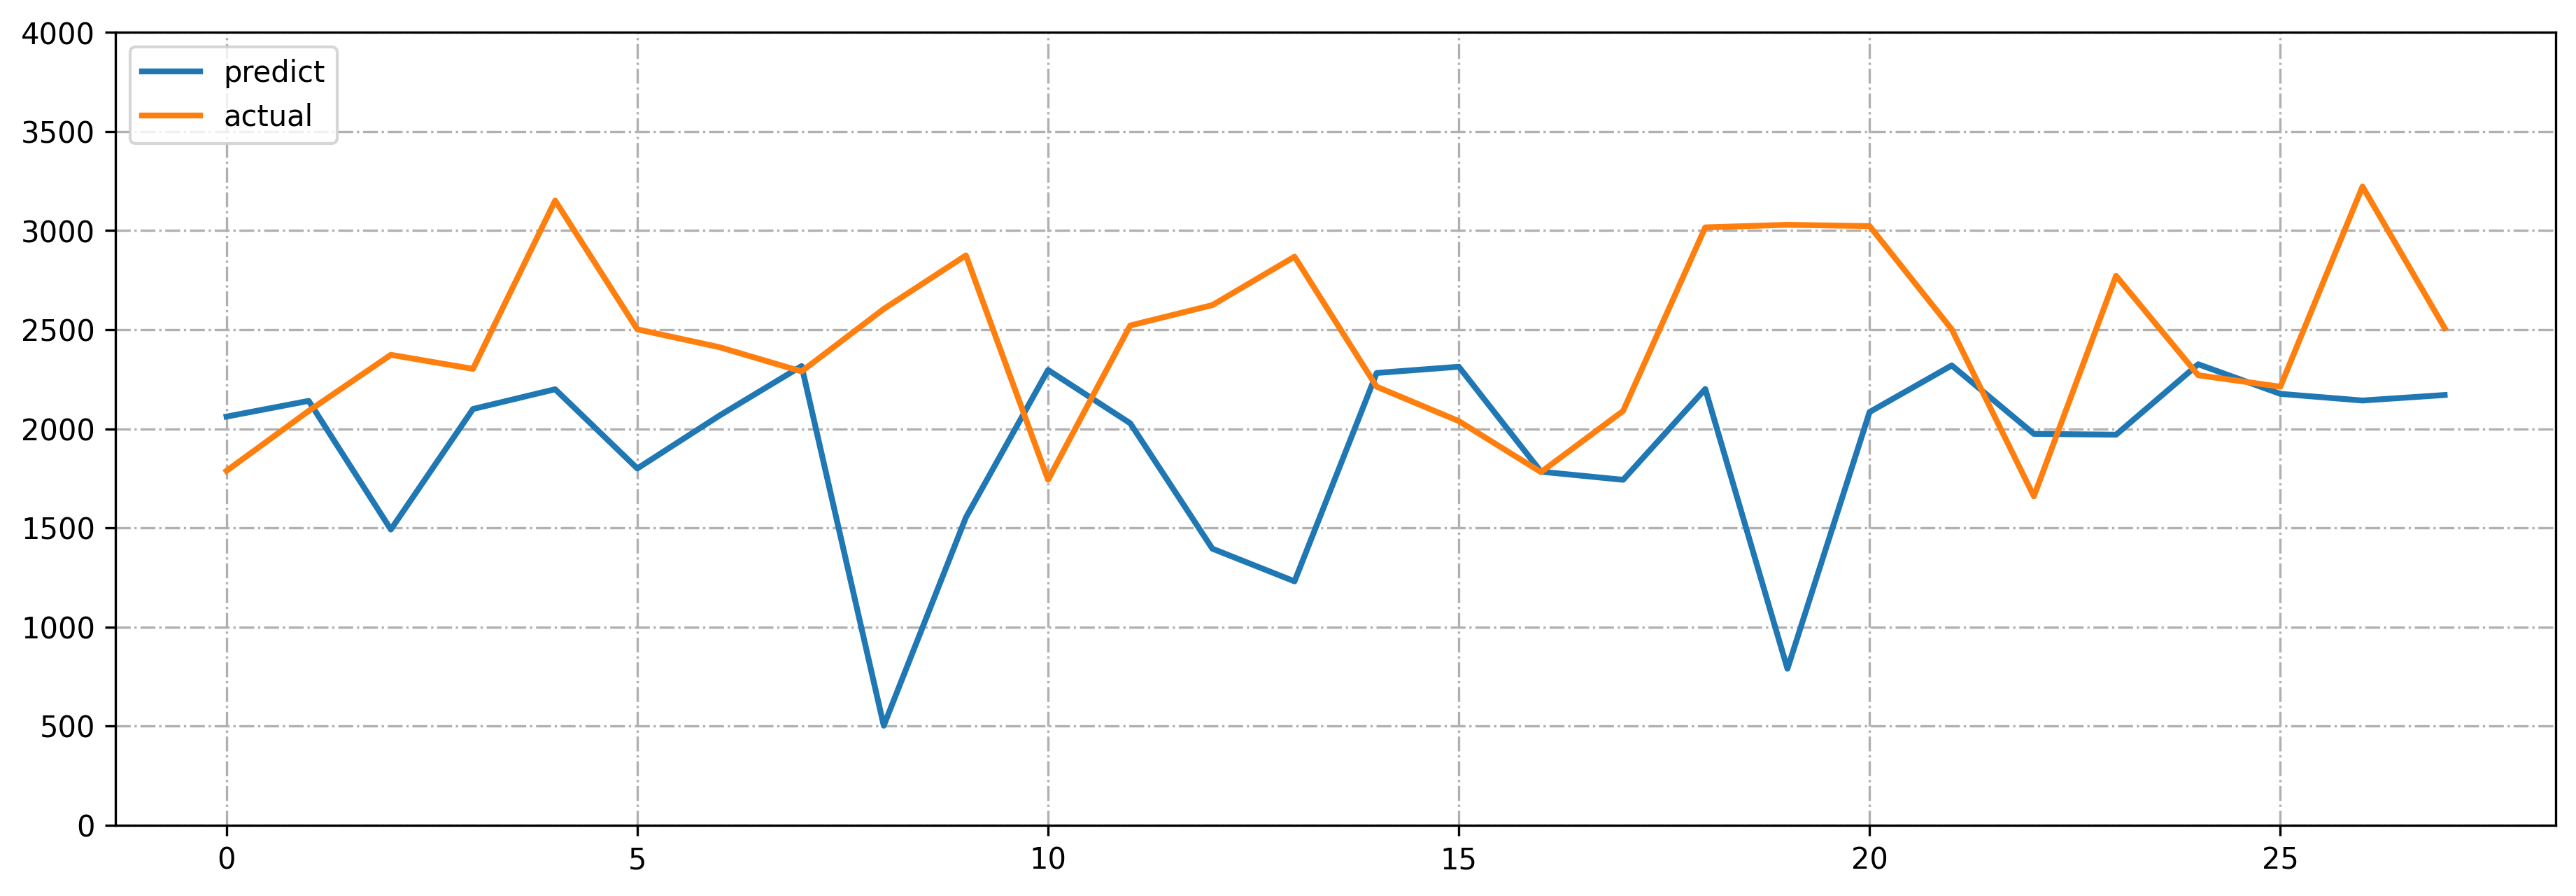

In [26]:
'''predict = validation
actual = actual
x = [x for x in range(28)]
fig, ax = plt.subplots(figsize=(15,5),dpi = 300)
ax.plot(x, predict, linewidth=2.0,label = "predict")
ax.plot(x, actual, linewidth=2.0,label = "actual")
ax.legend(loc=2);
# ax.set_title(bf_name)
plt.ylim((0, 4000))
plt.grid(linestyle='-.')
plt.show()'''

In [27]:
'''#ACC
error = 0
summery = 0
for i in range(24):
    error += abs(predict[i] - actual[i])
    summery += actual[i]
acc = 1 - error/summery
acc'''

0.7123996102569187